**9**
Let us consider another dataset **`Auto`** which has 397 sample cars a host of other attributes. While reading the CSV file, we use the following arguments:
- **header**: Set to _TRUE_ to ensure that the 1st row of the CSV files are not read as the first sample car.
- **na.strings**: Set to _?_ to ensure any question marks encountered in the dataset imply the data is not available.

In [1]:
Auto = read.csv("Datasets/Auto.csv", header=TRUE, na.strings="?")
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


Let us omit any sparse or incomplete data.

In [2]:
print(paste("Total Number of Sample cars = ", dim(Auto)[1]))
Auto=na.omit(Auto)
print(paste("Number of sample cars after deleting incomplete sample data = ", dim(Auto)[1]))

[1] "Total Number of Sample cars =  397"
[1] "Number of sample cars after deleting incomplete sample data =  392"


The last column is just the name of the car saples. __*Can we use this to index each row, replacing the numerical index?*__ No, we cannot. In order to index a column, it must be unique. The **table** function allows us to create a frequency distribution table. Let us see which names are repeated.

In [3]:
n_occur = data.frame(table(Auto$name)) # This is a Frequency Distribution Table
n_occur[n_occur$Freq > 1,] #Get only duplicate entries

,Var1,Freq
4,amc concord,2
7,amc gremlin,4
8,amc hornet,4
10,amc matador,5
11,amc matador (sw),2
17,audi 100ls,2
24,buick century,2
30,buick estate wagon (sw),2
35,buick skylark,2
44,chevrolet caprice classic,3


Each one of these entries is repeated at least once. So we will stick to the numerical indexing and remove the last __names__ column.

In [4]:
car_names = Auto[,ncol(Auto)] #Store Car Names for later use
Auto = Auto[,-ncol(Auto)] #Remove the names column
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
18,8,307,130,3504,12.0,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11.0,70,1
16,8,304,150,3433,12.0,70,1
17,8,302,140,3449,10.5,70,1
15,8,429,198,4341,10.0,70,1


---
**9 (a).** Looking at the dataset it isn't too difficult to determine the qualitative and quantitative variables. The following variables are _categorical_ (Qualitative):
- **Cylinders**: This number is one of 3 categories 4, 6, or 8.
- **Origin**: This value predominantly takes one of 3 values 1, 2, or 3.

**_NOTE_**: The field **Year** _can_ be considered categorical since there are only 13 years: 70 to 82 inclusive. However, for the same problem with different samples, there may be a wide range of years (too much for considering it a categorical variable). 

The remaining categories are Quantitative.

---
**9 (b)** Let us determine the range of these quantitative predictors. They are respectively the lowest and highest value of a field for all samples. We will determine them in 3 using:
- _min_ and _max_
- _range_
- _summary_

Let us first take a look at the _min_ and _max_ implementation.

In [13]:
variable = c("mpg", "displacement", "horsepower", "weight", "acceleration", "year")
minimum = c(min(Auto$mpg), min(Auto$displacement), min(Auto$horsepower), min(Auto$weight), min(Auto$acceleration), min(Auto$year))
maximum = c(max(Auto$mpg), max(Auto$displacement), max(Auto$horsepower), max(Auto$weight), max(Auto$acceleration), max(Auto$year))
tab = data.frame(variable, minimum, maximum)
tab

variable,minimum,maximum
mpg,9,46.6
displacement,68,455.0
horsepower,46,230.0
weight,1613,5140.0
acceleration,8,24.8
year,70,82.0


Now let us take a look at the values using R's _range_ function.

In [14]:
range(Auto$mpg)
range(Auto$displacement)
range(Auto$horsepower)
range(Auto$weight)
range(Auto$acceleration)
range(Auto$year)

[1]  9.0 46.6

[1]  68 455

[1]  46 230

[1] 1613 5140

[1]  8.0 24.8

[1] 70 82

And now the same with the _summary_ function. Pay attention to the _Min._ and _Max._ values.

In [7]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration        year           origin     
 Min.   : 8.00   Min.   :70.00   Min.   :1.000  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000  
 Median :15.50   Median :76.00   Median :1.000  
 Mean   :15.54   Mean   :75.98   Mean   :1.577  
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000  
 Max.   :24.80   Max.   :82.00   Max.   :3.000  

Ignoring the summary for qualitative variables, we see the minimum and maximum values for each quantitative field can be easily discovered. Their values **are equal** regardless of function used. 

**9 (c)** Let us determine the mean, standard deviation of each predictor.

In [15]:
mean = c(mean(Auto$mpg), mean(Auto$displacement), mean(Auto$horsepower), mean(Auto$weight), mean(Auto$acceleration), mean(Auto$year))
sd = c(sd(Auto$mpg), sd(Auto$displacement), sd(Auto$horsepower), sd(Auto$weight), sd(Auto$acceleration), sd(Auto$year))
tab = data.frame(variable, mean, sd)
tab

variable,mean,sd
mpg,23.44592,7.805007
displacement,194.41199,104.644004
horsepower,104.46939,38.491160
weight,2977.58418,849.402560
acceleration,15.54133,2.758864
year,75.97959,3.683737


**9 (d)** Let us remove the 10th to the 85th observation and observe the range, mean, and standard deviation for the data that remains.

In [16]:
sub_Auto = Auto[-c(10:85),] #Remove 10th to 85th row, keep all columns

minimum = c(min(sub_Auto$mpg), min(sub_Auto$displacement), min(sub_Auto$horsepower), min(sub_Auto$weight), min(sub_Auto$acceleration), min(sub_Auto$year))
maximum = c(max(sub_Auto$mpg), max(sub_Auto$displacement), max(sub_Auto$horsepower), max(sub_Auto$weight), max(sub_Auto$acceleration), max(sub_Auto$year))
mean = c(mean(sub_Auto$mpg), mean(sub_Auto$displacement), mean(sub_Auto$horsepower), mean(sub_Auto$weight), mean(sub_Auto$acceleration), mean(sub_Auto$year))
sd = c(sd(sub_Auto$mpg), sd(sub_Auto$displacement), sd(sub_Auto$horsepower), sd(sub_Auto$weight), sd(sub_Auto$acceleration), sd(sub_Auto$year))
tab = data.frame(variable, minimum, maximum, mean, sd)
tab

variable,minimum,maximum,mean,sd
mpg,11.0,46.6,24.40443,7.867283
displacement,68.0,455.0,187.24051,99.678367
horsepower,46.0,230.0,100.72152,35.708853
weight,1649.0,4997.0,2935.97152,811.300208
acceleration,8.5,24.8,15.72690,2.693721
year,70.0,82.0,77.14557,3.106217


**9 (e)** Let us generate scatter plots among predictors.

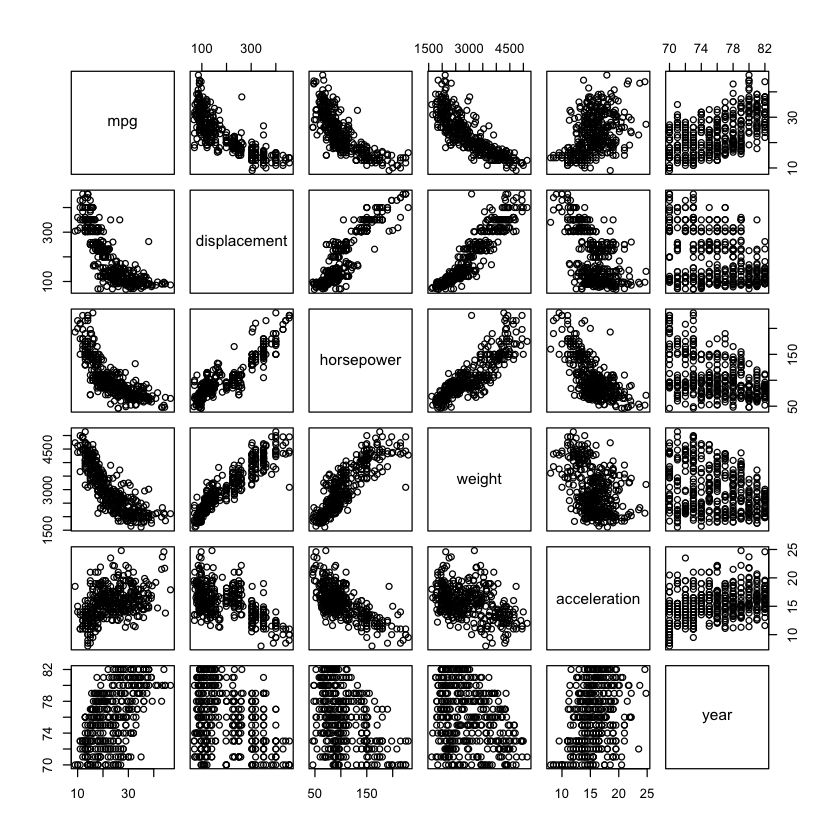

In [17]:
pairs(c(Auto['mpg'], Auto['displacement'], Auto['horsepower'], Auto['weight'], Auto['acceleration'], Auto['year']))

Some observations based on the scatterplot matrix above:
- The mpg decreases (exponentially) with the increase in displacement, horsepower and weight.
- displacement increases linearly with horsepower and weight.
- horsepower increases nearly linearly with weight and decreases linearly with acceleration.

**9 (f)** As mentioned in the first point of _9(e)_, there exists a negative correlation between mpg and the 3 predictors: displacement, horsepower and weight. Additionally, we see that newer vehicles have higher mpgs (evidenced by the mpg vs year scatterplot). Given enough datapoints, we may be able to make decent predictions with displacement, horsepower, weight and year as _predictors_. 